
Credit Card Approval Prediction




In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from catboost import CatBoostRegressor

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data sets/application_record.csv')

In [4]:
df1=pd.read_csv('/content/drive/MyDrive/data sets/credit_record.csv')

In [5]:
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [6]:
df1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [7]:
df.shape#VIEWING THE SHAPE OF THE FILE

(438557, 18)

In [8]:
df1.shape#VIEWING THE SHAPE OF THE FILE

(1048575, 3)

In [9]:
df.columns#VIEWING THE COLUMN NAMES OF THE FILE

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [10]:
df1.columns#VIEWING THE COLUMN NAMES OF THE FILE

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [11]:
df.info()#VIEWING THE INFO OF THE FILE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [12]:
df1.info()#VIEWING THE INFO OF THE FILE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [13]:
df.describe()#BASIC DESCRIPTIVE ANALYSIS OF THE DATA

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [14]:
df1.describe()#BASIC DESCRIPTIVE ANALYSIS OF THE DATA

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [15]:
df.isnull().sum()#MISSING VALUE ANALYSIS

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [16]:
df1.isnull().sum()#MISSING VALUE ANALYSIS

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [17]:
#fill missing values
df['OCCUPATION_TYPE'].fillna(value='other',inplace=True)

In [18]:
df.isnull().sum()#MISSING VALUE ANALYSIS

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [19]:
df.duplicated().sum()#CHECKING FOR DUPLICATE VALUES

0

In [20]:
df1.duplicated().sum()#CHECKING FOR DUPLICATE VALUES

0

In [21]:
df1['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [22]:
#in status it is cateegorical and numerical so we are changing the type
df1['target']=df1['STATUS']
df1['target'].replace('X',0,inplace=True)
df1['target'].replace('C',0,inplace=True)
df1['target']=df1['target'].astype(int)
df1.loc[df1['target']>1,'target']=1

In [23]:
df1


,ID,MONTHS_BALANCE,STATUS,target
0,5001711,0,X,0
1,5001711,-1,0,0
2,5001711,-2,0,0
3,5001711,-3,0,0
4,5001712,0,C,0
...,...,...,...,...
1048570,5150487,-25,C,0
1048571,5150487,-26,C,0
1048572,5150487,-27,C,0
1048573,5150487,-28,C,0


In [24]:
df1.drop('STATUS',axis=1,inplace=True)

In [25]:
df1

,ID,MONTHS_BALANCE,target
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [26]:
new_df=pd.merge(df,df1,how='inner',on=['ID'])#merging table 1 and table 2

In [27]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [28]:
new_df['AGE_YEARS']=round(-new_df['DAYS_BIRTH']/365,0)#changing to positive and to age years

In [29]:
new_df['YEARS_EMPLOYED']=round(-new_df["DAYS_EMPLOYED"]/365,0)
new_df.loc[new_df['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0#changing to positive and to years employed

In [30]:
new_df['MONTHS_BALANCE1']=round(-new_df["MONTHS_BALANCE"],0)#changing to positive

In [31]:
new_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,target,AGE_YEARS,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,0,0,33.0,12.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-1,0,33.0,12.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-2,0,33.0,12.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-3,0,33.0,12.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-4,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,25.0,3.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,1,25.0,3.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,25.0,3.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,25.0,3.0,12


In [32]:
new_df.drop(['DAYS_BIRTH','DAYS_EMPLOYED','MONTHS_BALANCE'],axis=1,inplace=True)#dropping the unwanted columns

In [33]:
new_df.drop(["FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"],axis=1,inplace=True)#dropping the unwanted columns


In [34]:
new_df.drop(["FLAG_OWN_CAR","FLAG_OWN_REALTY"],axis=1, inplace=True)#dropping the unwanted columns

In [35]:
new_df

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target,AGE_YEARS,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,0
1,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,1
2,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,2
3,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,3
4,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,9
777711,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,10
777712,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,11
777713,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,12


In [36]:
new_df = new_df.rename(columns={'CODE_GENDER': 'Gender','CNT_CHILDREN':'Num_children',
                               'AMT_INCOME_TOTAL':'Total_income','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_type','NAME_FAMILY_STATUS':'Family_status',
                               'NAME_HOUSING_TYPE':'Housing_type','OCCUPATION_TYPE':'Occupation_type',
                               'CNT_FAM_MEMBERS':'Num_family','target':'Target','ACCOUNT_LENGTH':'Account_length',
                                'AGE_YEARS':'Age'})#renaming the column name

In [37]:
new_df

,ID,Gender,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Target,Age,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,0
1,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,1
2,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,2
3,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,3
4,5008804,M,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,9
777711,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,10
777712,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,11
777713,5150337,M,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,12


In [38]:
#converting the catergorical column to numerical
for col in new_df.select_dtypes(include=['object']).columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(new_df[col].unique())
  new_df[col]=label_encoder.transform(new_df[col])

In [39]:
new_df

,ID,Gender,Num_children,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Target,Age,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,1,0,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,0
1,5008804,1,0,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,1
2,5008804,1,0,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,2
3,5008804,1,0,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,3
4,5008804,1,0,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,112500.0,4,4,3,4,8,1.0,0,25.0,3.0,9
777711,5150337,1,0,112500.0,4,4,3,4,8,1.0,1,25.0,3.0,10
777712,5150337,1,0,112500.0,4,4,3,4,8,1.0,1,25.0,3.0,11
777713,5150337,1,0,112500.0,4,4,3,4,8,1.0,0,25.0,3.0,12


<Axes: >

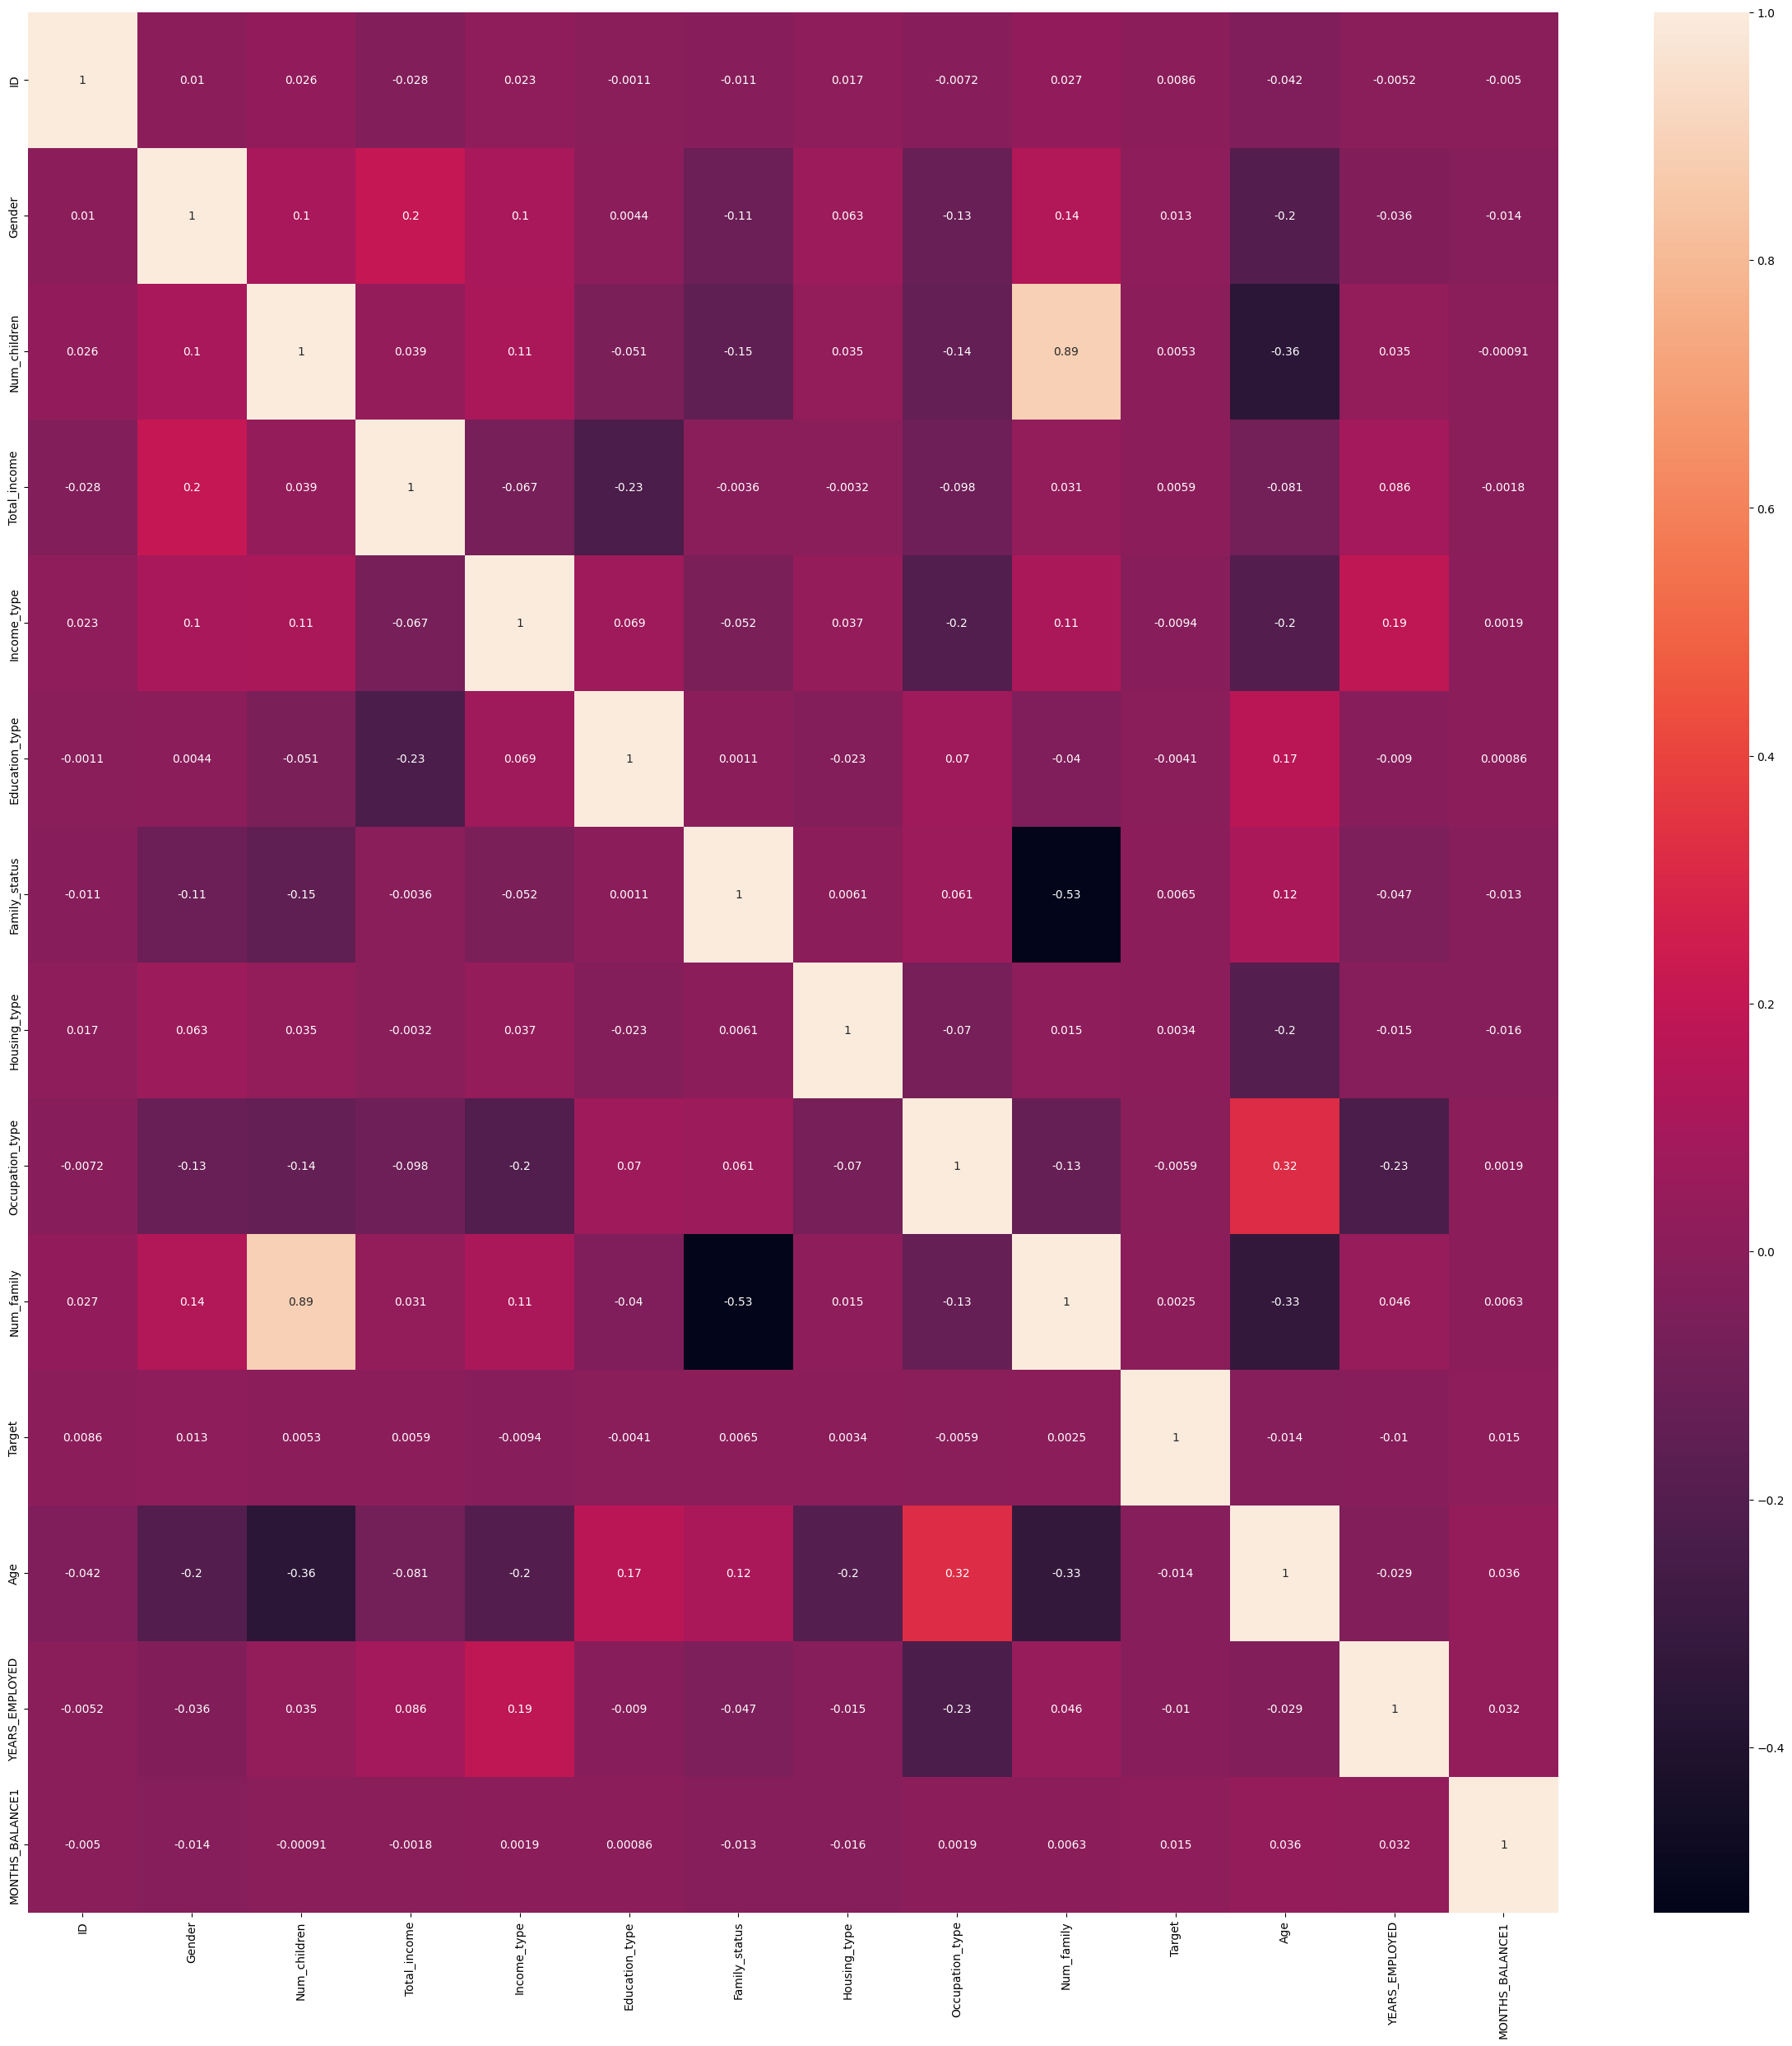

In [40]:
#checking any correlation between columns
plt.figure(figsize=(30,30))
sns.heatmap(new_df.corr(),annot=True)

In [41]:
new_df.drop('Num_children',axis=1, inplace=True)#droping this column bcz it is correlated with num_family

In [42]:
new_df

,ID,Gender,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Target,Age,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,0
1,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,1
2,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,2
3,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,3
4,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,112500.0,4,4,3,4,8,1.0,0,25.0,3.0,9
777711,5150337,1,112500.0,4,4,3,4,8,1.0,1,25.0,3.0,10
777712,5150337,1,112500.0,4,4,3,4,8,1.0,1,25.0,3.0,11
777713,5150337,1,112500.0,4,4,3,4,8,1.0,0,25.0,3.0,12


In [43]:
new_df['YEARS_EMPLOYED'].unique()

array([12.,  3.,  8.,  0.,  2.,  4.,  6.,  9., 19., 15.,  5., 13.,  7.,
       17., 30., 16., 11.,  1., 10., 24., 14., 25., 20., 27., 18., 21.,
       23., 22., 28., 39., 32., 33., 37., 26., 38., 31., 29., 35., 34.,
       41., 40., 36., 42., 43.])

In [44]:
new_df.columns

Index(['ID', 'Gender', 'Total_income', 'Income_type', 'Education_type',
       'Family_status', 'Housing_type', 'Occupation_type', 'Num_family',
       'Target', 'Age', 'YEARS_EMPLOYED', 'MONTHS_BALANCE1'],
      dtype='object')

In [45]:
new_df

,ID,Gender,Total_income,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Num_family,Target,Age,YEARS_EMPLOYED,MONTHS_BALANCE1
0,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,0
1,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,1
2,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,2
3,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,3
4,5008804,1,427500.0,4,1,0,4,18,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,112500.0,4,4,3,4,8,1.0,0,25.0,3.0,9
777711,5150337,1,112500.0,4,4,3,4,8,1.0,1,25.0,3.0,10
777712,5150337,1,112500.0,4,4,3,4,8,1.0,1,25.0,3.0,11
777713,5150337,1,112500.0,4,4,3,4,8,1.0,0,25.0,3.0,12


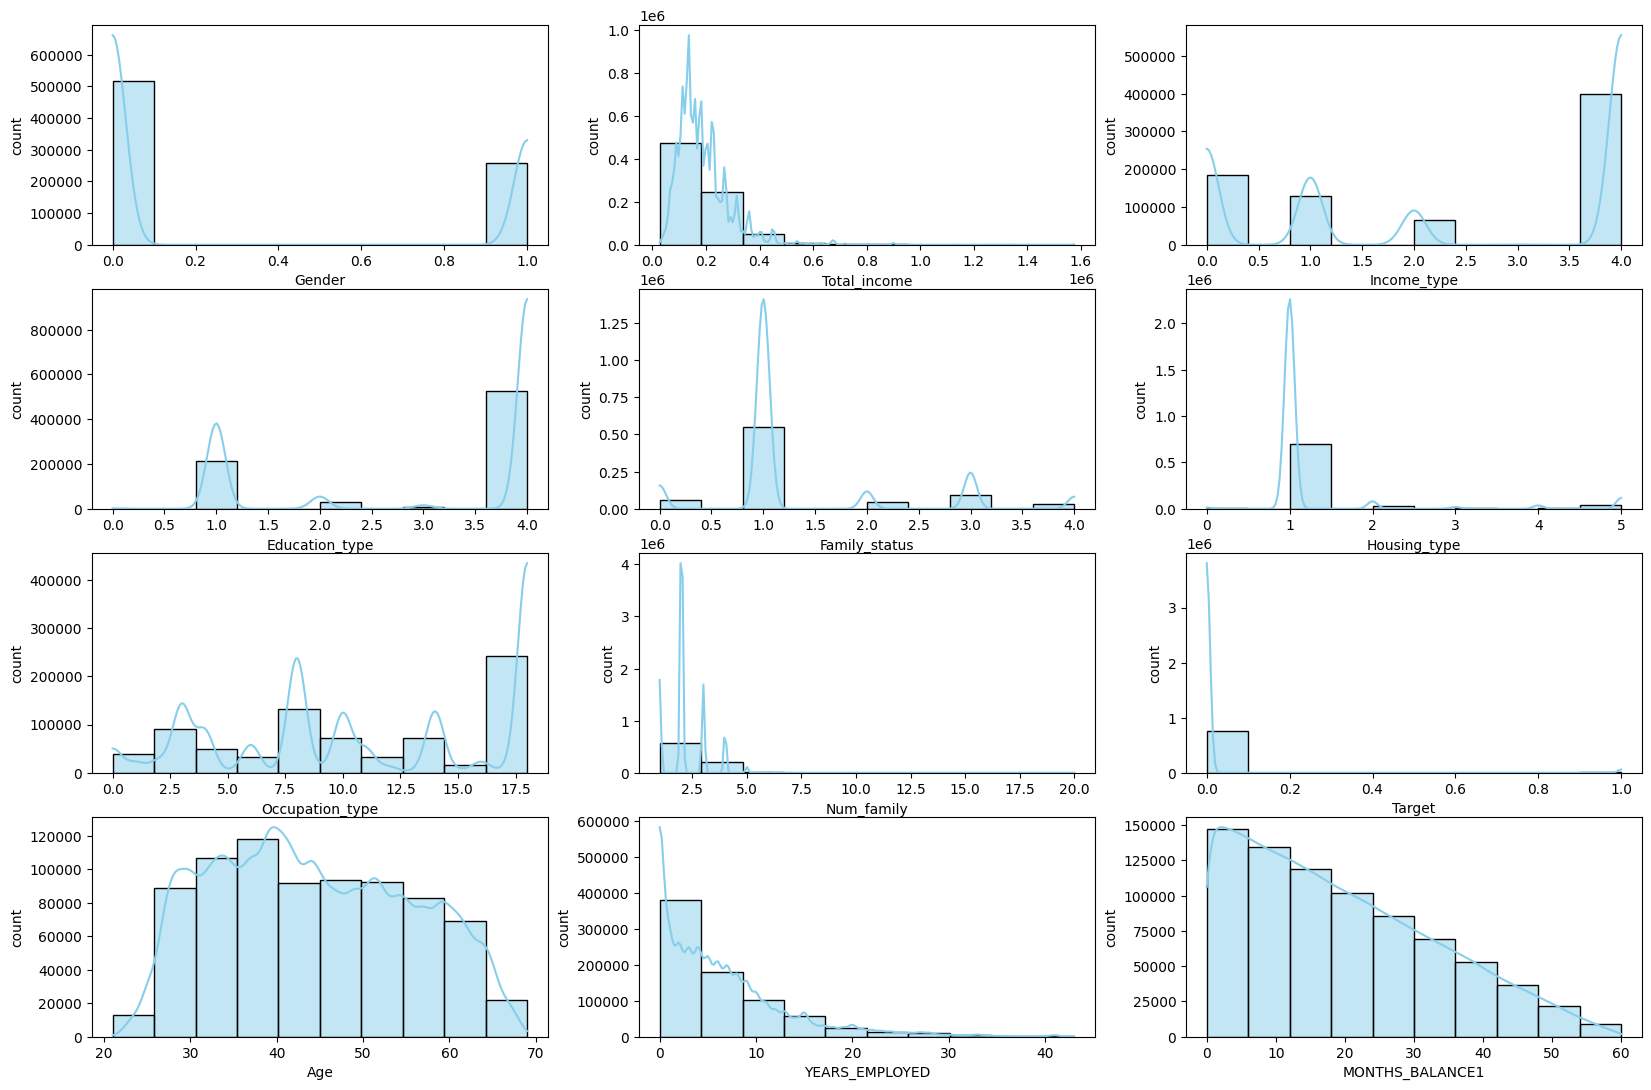

In [46]:
num=['Gender', 'Total_income', 'Income_type', 'Education_type',
       'Family_status', 'Housing_type', 'Occupation_type', 'Num_family',
       'Target', 'Age', 'YEARS_EMPLOYED', 'MONTHS_BALANCE1']
plt.figure(figsize=(20,20))
for i,col in enumerate(num,1):
  plt.subplot(6,3,i)
  sns.histplot(data=new_df,kde=True,x=col,bins=10,color='skyblue')
  plt.xlabel(col)
  plt.ylabel('count')



interpretation of Kappa Score:
0.81 - 1.00: Almost perfect agreement
0.61 - 0.80: Substantial agreement
0.41 - 0.60: Moderate agreement
0.21 - 0.40: Fair agreement
0.00 - 0.20: Slight agreement
< 0.00: Poor agreement
Cohen's Kappa is a useful metric for understanding the agreement between two raters or between predicted and true labels, considering the agreement occurring by chance.

LOGISTIC REGRESSION

In [47]:
x=new_df[['ID', 'Gender', 'Total_income', 'Income_type', 'Education_type',
       'Family_status', 'Housing_type', 'Occupation_type', 'Num_family',
        'Age', 'YEARS_EMPLOYED', 'MONTHS_BALANCE1']].values
y=new_df['Target'].values


x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

In [48]:
# create logistics regression model

model=LogisticRegression()

#train the model on scaled training set
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
model.score(x_train,y_train)##training performnace

0.9850684376667546

In [50]:

#make predictions on the test set

y_pred=model.predict(x_test)


# evaluate the model

accuracy=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
classification_reg=classification_report(y_test,y_pred)
print('accuracy:',accuracy*100)
print("confusion matrix:",conf_matrix)
print('classification regression:',classification_reg)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
kappa_score = cohen_kappa_score(y_test,y_pred)
print('kappa score',kappa_score)#only for classification problem

accuracy: 98.53095285548048
confusion matrix: [[153258      0]
 [  2285      0]]
classification regression:               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    155543
   macro avg       0.49      0.50      0.50    155543
weighted avg       0.97      0.99      0.98    155543

kappa score 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In logitic regression we get accuracy 98.5 ,but kappa score is 0



RANDOM FOREST

In [51]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)
y_pred2=random_forest.predict(x_test)

In [52]:
#checking the model performnace
random_forest.score(x_train,y_train)

0.999979105456369

In [53]:
#EVALUATING THE MODEL
accuracy2 = accuracy_score(y_test,y_pred2)
conf_matrix2=confusion_matrix(y_test,y_pred2)
classification_reg2=classification_report(y_test,y_pred2)
kappa_score1 = cohen_kappa_score(y_test,y_pred2)


print("accuracy : ",accuracy2)
print("confusion matrix : ",conf_matrix2)
print("classification regression : ", classification_reg2)
print('kappa score',kappa_score1)#only for classification problem

accuracy :  0.9867625029734542
confusion matrix :  [[152588    670]
 [  1389    896]]
classification regression :                precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.57      0.39      0.47      2285

    accuracy                           0.99    155543
   macro avg       0.78      0.69      0.73    155543
weighted avg       0.98      0.99      0.99    155543

kappa score 0.4588684067039239


In random forest we get accuracy 98.6,but kappa score is 0.46

DECISION TREE WITH SMOTE

In [54]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
bbc.fit(x_train, y_train)
y_pred_d = bbc.predict(x_test)


accuracy_bbc = accuracy_score(y_test, y_pred_d)
conf_matrix_bbc = confusion_matrix(y_test, y_pred_d)
classification_reg_bbc = classification_report(y_test, y_pred_d)
kappa_score_bbc = cohen_kappa_score(y_test, y_pred_d)
print(accuracy_bbc)
print(kappa_score_bbc)

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


0.8982082125200106
0.15899521232442393


In decision tree with smote we get accuracy 89.8,but kappa score is 0.15

BALANCING EQUAL SAMPLE

In [55]:
from imblearn.over_sampling import RandomOverSampler
r = RandomOverSampler(random_state=42)
X_r, y_r = r.fit_resample(x, y)
unique, counts = np.unique(y_r, return_counts=True)
print(dict(zip(unique,counts)))

{0: 766140, 1: 766140}


BALANCED DATA WITH LOGISTIC REGRESSION

In [56]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_r,y_r,train_size=0.8,random_state=42)

In [57]:
# create logistics regression model

modelr=LogisticRegression()

#train the model on scaled training set
modelr.fit(x_train1,y_train1)

LogisticRegression()

In [58]:
modelr.score(x_train1,y_train1)##training performnace

0.5070613725950871

In [59]:

#make predictions on the test set

y_predr=modelr.predict(x_test1)


# evaluate the model

accuracyr=accuracy_score(y_test1,y_predr)
conf_matrixr=confusion_matrix(y_test1,y_predr)
classification_regr=classification_report(y_test1,y_predr)
print('accuracy:',accuracyr*100)
print("confusion matrix:",conf_matrixr)
print('classification regression:',classification_regr)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
kappa_scorer = cohen_kappa_score(y_test1,y_predr)
print('kappa score',kappa_scorer)#only for classification problem

accuracy: 50.77498890542198
confusion matrix: [[94301 58613]
 [92240 61302]]
classification regression:               precision    recall  f1-score   support

           0       0.51      0.62      0.56    152914
           1       0.51      0.40      0.45    153542

    accuracy                           0.51    306456
   macro avg       0.51      0.51      0.50    306456
weighted avg       0.51      0.51      0.50    306456

kappa score 0.01593819724403822


logistic regression(balanced) gives accuracy 50 ,but kappa acsore is 0.01

DECISON TREE WITH BALANCED DATA

In [60]:
#training the algorithm
dec_tree = DecisionTreeClassifier()#here we use decision tree classifier bcs it is not a continious data
dec_tree.fit(x_train1,y_train1)
y_predd = dec_tree.predict(x_test1)#make predictions on testing set

In [61]:
#checking the model performnace
dec_tree.score(x_train1,y_train1)

1.0

In [62]:
#evaluation of the model
accuracyd = accuracy_score(y_test1,y_predd)
conf_matrixd=confusion_matrix(y_test1,y_predd)
classification_regd=classification_report(y_test1,y_predd)

print("accuracy : ",accuracyd)
print("confusion matrix : ",conf_matrixd)
print("classification regression : ", classification_regd)
kappa_scored = cohen_kappa_score(y_test1,y_predd)
print('kappa score',kappa_scored)#only for classification problem

accuracy :  0.9951869110084319
confusion matrix :  [[151439   1475]
 [     0 153542]]
classification regression :                precision    recall  f1-score   support

           0       1.00      0.99      1.00    152914
           1       0.99      1.00      1.00    153542

    accuracy                           1.00    306456
   macro avg       1.00      1.00      1.00    306456
weighted avg       1.00      1.00      1.00    306456

kappa score 0.9903735916988


Decision tree with balanced data training score is 100 and accuracy is 99.5 and kappa score is 99.0

BALANCED DATA WITH RANDOM FOREST

In [63]:
random_forestrr=RandomForestClassifier()
random_forestrr.fit(x_train1,y_train1)
y_predrr=random_forestrr.predict(x_test1)

In [64]:
#checking the model performnace
random_forestrr.score(x_train1,y_train1)

0.9999983684444096

In [65]:
#EVALUATING THE MODEL
accuracyrr = accuracy_score(y_test1,y_predrr)
conf_matrixrr=confusion_matrix(y_test1,y_predrr)
classification_regrr=classification_report(y_test1,y_predrr)

print("accuracy : ",accuracyrr)
print("confusion matrix : ",conf_matrixrr)
print("classification regression : ", classification_regrr)

accuracy :  0.9950890176730102
confusion matrix :  [[151409   1505]
 [     0 153542]]
classification regression :                precision    recall  f1-score   support

           0       1.00      0.99      1.00    152914
           1       0.99      1.00      1.00    153542

    accuracy                           1.00    306456
   macro avg       1.00      1.00      1.00    306456
weighted avg       1.00      1.00      1.00    306456



In [66]:
kappa_scorerr = cohen_kappa_score(y_test1,y_predrr)
print('kappa score',kappa_scorerr)#only for classification problem

kappa score 0.9901777964026346


Random forest with balanced data training score is 99.99 and accuracy is 99.5 and kappa score is 99.0

BALANCED DATA WITH GRADIENT BOOST

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_model=GradientBoostingClassifier()
gradient_boosting_model.fit(x_train1,y_train1)
gradient_predictions=gradient_boosting_model.predict(x_test1)

accuracy4 = accuracy_score(y_test1,gradient_predictions)
conf_matrix4=confusion_matrix(y_test1,gradient_predictions)
classification_reg4=classification_report(y_test1,gradient_predictions)

print("accuracy : ",accuracy4)
print("confusion matrix : ",conf_matrix4)
print("classification regression : ", classification_reg4)
kappa_scoreg = cohen_kappa_score(y_test1,gradient_predictions)
print('kappa score',kappa_scoreg)#only for classification problem

accuracy :  0.6362185762393296
confusion matrix :  [[102886  50028]
 [ 61455  92087]]
classification regression :                precision    recall  f1-score   support

           0       0.63      0.67      0.65    152914
           1       0.65      0.60      0.62    153542

    accuracy                           0.64    306456
   macro avg       0.64      0.64      0.64    306456
weighted avg       0.64      0.64      0.64    306456

kappa score 0.2725452686528358


Gradient boost with balanced data  accuracy is 63.6 and kappa score is 27.2

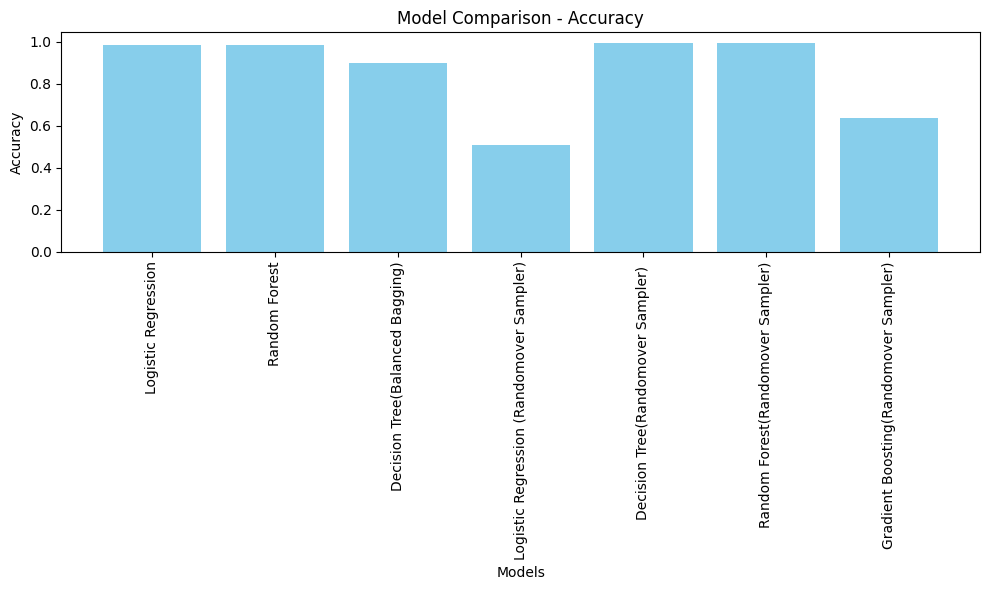

In [69]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree(Balanced Bagging)', 'Logistic Regression (Randomover Sampler)', 'Decision Tree(Randomover Sampler) ', 'Random Forest(Randomover Sampler)', 'Gradient Boosting(Randomover Sampler)']
accuracies = [accuracy, accuracy2, accuracy_bbc, accuracyr, accuracyd, accuracyrr, accuracy4]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

WE CAN CONCLUDE THAT BALANCED DATA WITH DECISON TREE AND RANDOM FOREST BEST MODELS FOR THIS DATA